In [22]:
import os
import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to download and extract ZIP file
def download_and_extract(url, target_dir):
    # Get the ZIP file name from the URL
    file_name = os.path.basename(url)

    # Split the file name to get rid of query parameters
    file_name = file_name.split('?')[0]

    # Download the ZIP file
    response = requests.get(url)
    with open(file_name, 'wb') as f:
        f.write(response.content)

    # Extract the ZIP file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(target_dir)

    # Remove the ZIP file after extraction
    os.remove(file_name)


# URL for train and test datasets
train_url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/68699/7659021/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1711995869&Signature=YmgmPilClOBslY6s3hCTvuU6kW6ztxIcPwXNvNQqic0vsDEsY7LxfpFt8T3%2Fz9YB0ZM%2Bxr7e9kGhiPI9h3wD96q%2F9e4jDhwdVm1PystQb88XZ1rs6lT%2FbIcDBq6J4Kuq8Hr9mZfWiGj%2BbN1w2ZTG1bNuBKvnXmDCH0Xv7S%2F8PG%2BCVfsWt2bjEYf3E%2FRK%2BH8y84HmrobMiN%2F%2B%2BhuYMRAwpAJQ8sreaAv9LP5AXBbD5%2F0OV94dWxUpU6QhwEeh%2FWm9y7xR8POkKn2CNtfNMVBXuDrQcWj9wA7J4%2FpkC0eVrebx%2FIYG5Yt3ptWp2PW7mnuhaOCeFkd1vksPCspHnvmCMw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip"
test_url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/68699/7659021/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1711995897&Signature=GrDM0Pq9iYD%2FDpc7izEZuEFGd%2BYQS%2Bc2wd7WbQkSWDtQoNL7h9JmuSWv%2B1xPAtiD3a87FIWTvh6XwSFfKHz0f0oWOvKCq5L38Ik9%2B1zP71Y0n9Ms%2FuXPR2jjBXqqBoueMWQOzD%2FEiDSjc7JJoZidCPkJm6g2KAoLYTtT4p7NdFcaWKrrvVa%2BfAHWIzUEBSH2PEVt%2FtkNwXhS738u3o21PGE1xs6PEneXb%2BSNmoTCMUOqm4DhrlDTO4FG5PVt8QLzmV%2FZtwAR8j7%2B3NtbH5x3OcspMTO8gobaG9EsOXoWwaEluuhx1uEC3siTe8TvZs5xYIyH7wPS2qDwfioLfXE6gg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip"

# Target directories for extracted files
train_target_dir = "./train_data"
test_target_dir = "./test_data"

# Download and extract train dataset
download_and_extract(train_url, train_target_dir)

# Download and extract test dataset
download_and_extract(test_url, test_target_dir)

In [23]:
import tensorflow as tf

# Cek apakah GPU tersedia dan aktif pada laptop Anda
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU ditemukan:")
    for device in physical_devices:
        print(device)
    try:
        # Konfigurasi Tensorflow untuk menggunakan GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)  # Set memory growth to avoid allocating all memory
        print("GPU telah dikonfigurasi untuk digunakan.")
    except RuntimeError as e:
        print(e)
else:
    print("Tidak ditemukan GPU. Pastikan driver GPU sudah terinstall dan TensorFlow mendukung GPU pada perangkat Anda.")


Tidak ditemukan GPU. Pastikan driver GPU sudah terinstall dan TensorFlow mendukung GPU pada perangkat Anda.


In [24]:
import pandas as pd

# Fungsi untuk membaca file CSV ke dalam DataFrame pandas
def read_csv(file_path):
    return pd.read_csv(file_path)

# Path file untuk dataset train dan test
train_file_path = "./train_data/train.csv"
test_file_path = "./test_data/test.csv"

# Membaca dataset train
train_data = read_csv(train_file_path)

# Membaca dataset test
test_data = read_csv(test_file_path)

# Menampilkan lima baris pertama dari dataset train
print("Train Dataset:")
print(train_data.head())

# Menampilkan lima baris pertama dari dataset test
print("\nTest Dataset:")
print(test_data.head())

# Menampilkan informasi struktur dan tipe data dari dataset train
print("\nInformasi Train Dataset:")
print(train_data.info())

# Menampilkan informasi struktur dan tipe data dari dataset test
print("\nInformasi Test Dataset:")
print(test_data.info())


Train Dataset:
   id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0            5               2274                    113  ...   
1           54              44478                     70  ...   
2          420            1311391                     29  ...   
3           29               3202                    114  ...   
4           67              48231                     82  ...   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.01

In [25]:
train_data.describe()
test_data.describe()


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,12814.000000,12814.000000,12814.000000,1.281400e+04,1.281400e+04,12814.000000,12814.000000,12814.000000,1.281400e+04,12814.000000,...,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000
mean,25625.500000,709.331356,753.274934,1.846533e+06,1.842029e+06,1672.908225,96.459497,64.730607,1.926893e+05,84.548072,...,0.030695,0.618650,0.833823,0.584985,2.472743,1.311689,1.388119,0.101164,-0.139516,0.572401
std,3699.227509,531.878508,500.743570,1.916427e+06,1.911426e+06,3725.518996,219.928548,188.506385,4.812871e+05,28.711574,...,0.048663,0.220361,0.220306,0.483308,0.761108,0.467621,0.401725,0.488127,0.117878,0.331974
min,19219.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,2.000000,5.350000e+02,0.000000,...,0.001500,0.014400,0.066700,0.000000,0.778200,0.344400,0.301000,-0.991000,-0.998900,0.119000
25%,22422.250000,46.000000,214.000000,6.401738e+05,6.398570e+05,91.000000,15.000000,14.000000,9.968000e+03,68.000000,...,0.006600,0.455075,0.666700,0.000000,1.959000,1.000000,1.079200,-0.277800,-0.192600,0.257000
50%,25625.500000,776.000000,796.000000,1.378890e+06,1.378588e+06,169.000000,24.000000,24.000000,1.840200e+04,90.000000,...,0.009500,0.638700,0.967700,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143900,0.472900
75%,28828.750000,1152.000000,1167.000000,2.368032e+06,2.356238e+06,649.000000,64.000000,60.000000,6.696025e+04,105.000000,...,0.019075,0.785700,1.000000,1.000000,2.814125,1.431400,1.707600,0.529400,-0.084300,0.999200
max,32032.000000,1688.000000,1712.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,...,0.747200,1.000000,1.000000,1.000000,4.680200,2.938500,4.258700,0.973900,0.591700,1.000000


In [26]:
print(train_data.columns)


Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')



Statistik Deskriptif dari Dataset Train:
                 id     X_Minimum     X_Maximum     Y_Minimum     Y_Maximum  \
count  19219.000000  19219.000000  19219.000000  1.921900e+04  1.921900e+04   
mean    9609.000000    709.854675    753.857641  1.849756e+06  1.846605e+06   
std     5548.191747    531.544189    499.836603  1.903554e+06  1.896295e+06   
min        0.000000      0.000000      4.000000  6.712000e+03  6.724000e+03   
25%     4804.500000     49.000000    214.000000  6.574680e+05  6.575020e+05   
50%     9609.000000    777.000000    796.000000  1.398169e+06  1.398179e+06   
75%    14413.500000   1152.000000   1165.000000  2.368032e+06  2.362511e+06   
max    19218.000000   1705.000000   1713.000000  1.298766e+07  1.298769e+07   

        Pixels_Areas   X_Perimeter   Y_Perimeter  Sum_of_Luminosity  \
count   19219.000000  19219.000000  19219.000000       1.921900e+04   
mean     1683.987616     95.654665     64.124096       1.918467e+05   
std      3730.319865    177.82138

<Figure size 1200x1000 with 0 Axes>

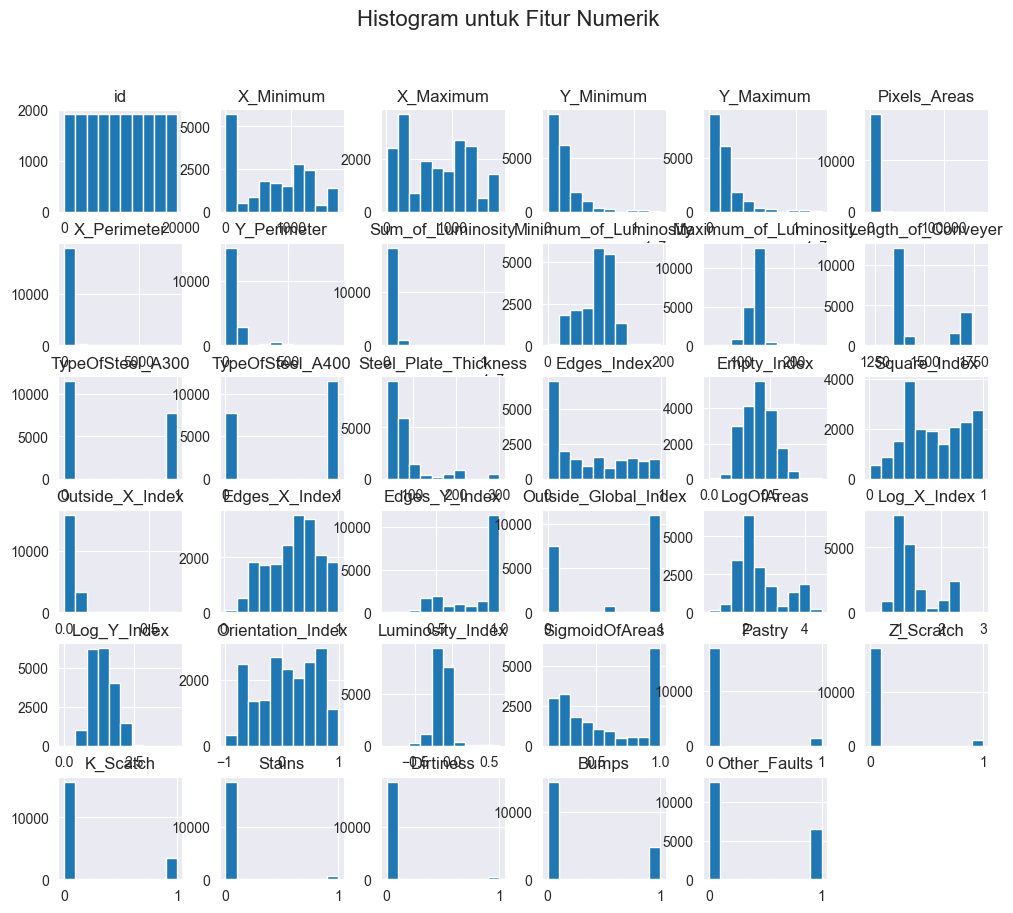

In [27]:
# Statistik Deskriptif dari Dataset Train
print("\nStatistik Deskriptif dari Dataset Train:")
print(train_data.describe())

# Langkah 4: Memahami Distribusi Variabel
# Histogram untuk fitur numerik
plt.figure(figsize=(12, 10))
train_data.hist(figsize=(12, 10))
plt.suptitle('Histogram untuk Fitur Numerik', fontsize=16)
plt.show()

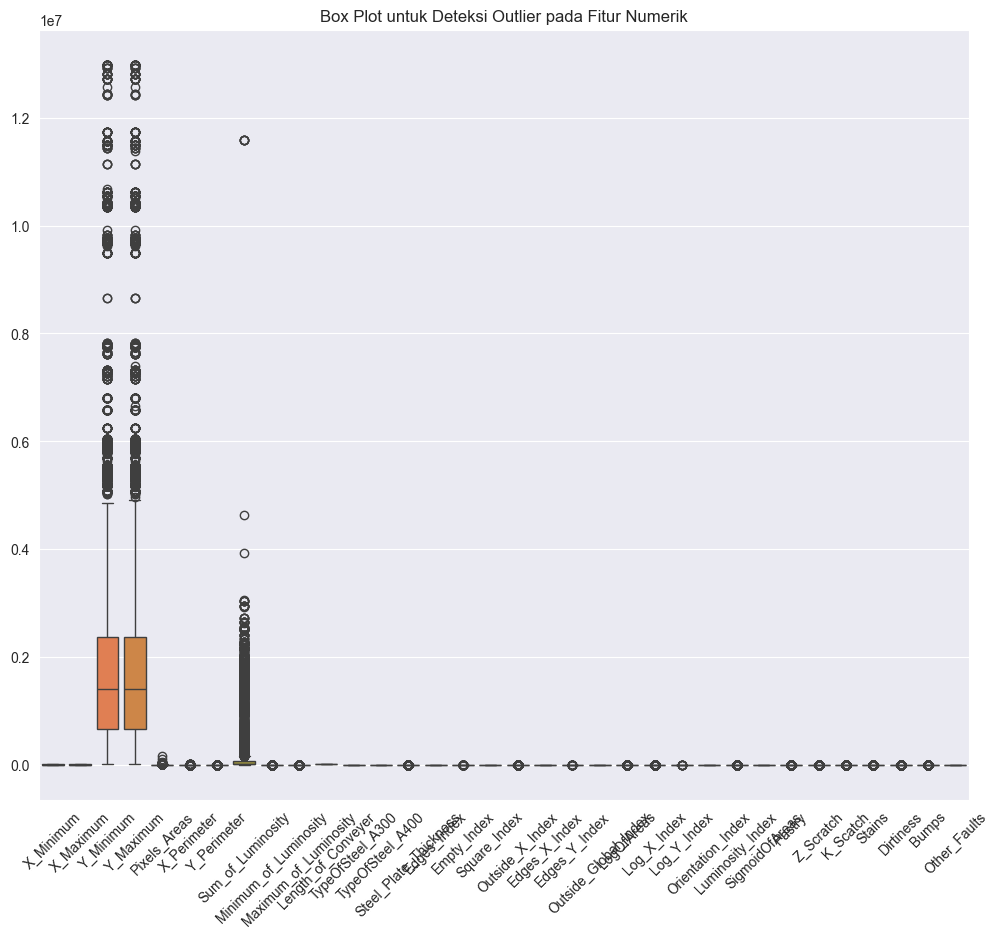

In [28]:
# Box plot untuk deteksi outlier pada fitur numerik
plt.figure(figsize=(12, 10))
sns.boxplot(data=train_data.drop(columns=['id']))
plt.title('Box Plot untuk Deteksi Outlier pada Fitur Numerik')
plt.xticks(rotation=45)
plt.show()



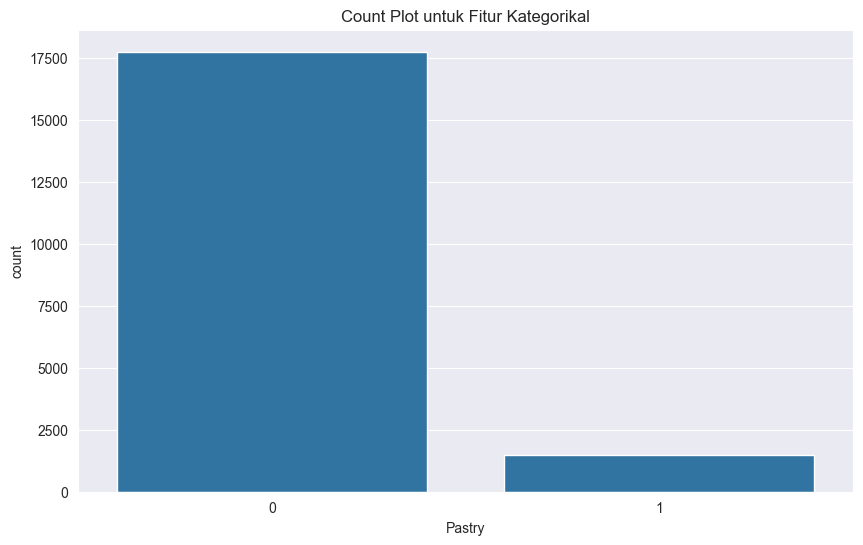

In [29]:
# Bar plot untuk fitur kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Pastry')
plt.title('Count Plot untuk Fitur Kategorikal')
plt.show()

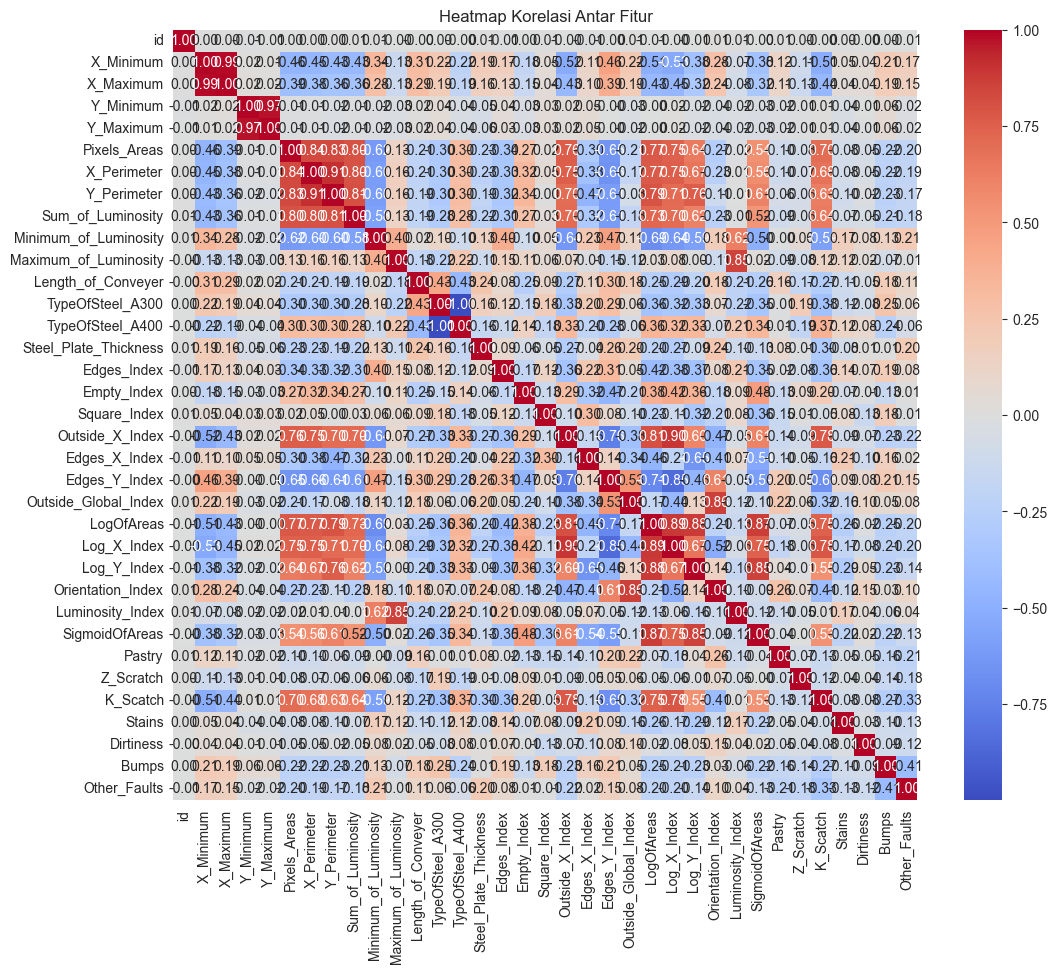

In [30]:
# Langkah 5: Memahami Korelasi Antar Variabel
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


Jumlah Missing Values pada Dataset Train:
id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

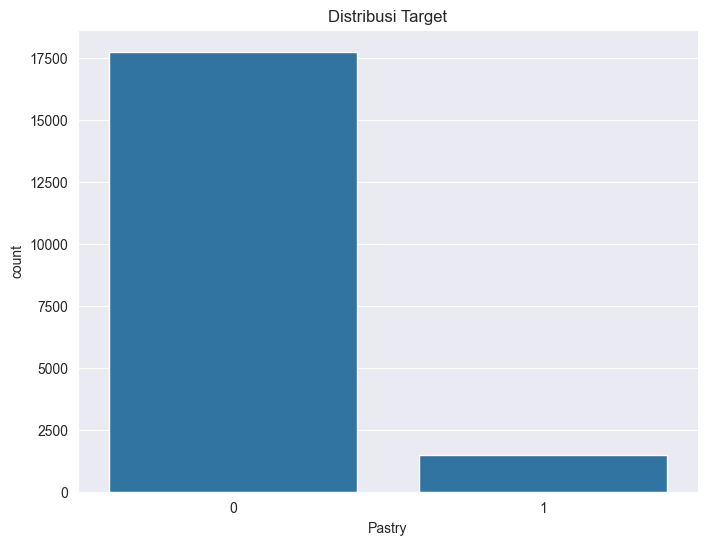

In [31]:
# Langkah 6: Menangani Missing Values
print("\nJumlah Missing Values pada Dataset Train:")
print(train_data.isnull().sum())

print("\nJumlah Missing Values pada Dataset Test:")
print(test_data.isnull().sum())

# Langkah 7: Analisis Target (jika ada)
# Misalnya, analisis distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Pastry')
plt.title('Distribusi Target')
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Baca dataset
train_df = pd.read_csv("./train_data/train.csv")
test_df = pd.read_csv("./test_data/test.csv")

# Pisahkan fitur dan target
X_train = train_df.drop(columns=["id", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"])
y_train = train_df[["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Scaling
scaler = StandardScaler()  # bisa diganti dengan MinMaxScaler() atau RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)

# Reduksi Dimensi
pca = PCA(n_components=0.95)  # Menjaga 95% dari varians asli
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

# Pemilihan Fitur
y_train_single = y_train["Pastry"]  # Memilih kolom 'Pastry' sebagai representasi kelas tunggal
selector = SelectKBest(score_func=f_classif, k=10)  # Ubah k sesuai dengan kebutuhan
X_train_selected = selector.fit_transform(X_train_scaled, y_train_single)

# Handling Imbalanced Data (oversampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_single)

# Split dataset menjadi train dan validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Proses preprocessing untuk data test (jika diperlukan)
X_test = test_df.drop(columns=["id"])

# Handle missing values pada data test
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Scaling pada data test
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

# Reduksi Dimensi pada data test
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

# Pemilihan Fitur pada data test
X_test_selected = selector.transform(X_test_scaled)


In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Baca dataset
train_df = pd.read_csv("./train_data/train.csv")
test_df = pd.read_csv("./test_data/test.csv")

# Pisahkan fitur dan target
X_train = train_df.drop(columns=["id", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"])
y_train = train_df[["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Scaling
scaler = StandardScaler()  # menggunakan StandardScaler untuk normalisasi
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)

# Reduksi Dimensi
pca = PCA(n_components=0.95)  # Menjaga 95% dari varians asli
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

# Pemilihan Fitur
y_train_single = y_train["Pastry"]  # Memilih kolom 'Pastry' sebagai representasi kelas tunggal
selector = SelectKBest(score_func=f_classif, k=10)  # Ubah k sesuai dengan kebutuhan
X_train_selected = selector.fit_transform(X_train_scaled, y_train_single)

# Handling Imbalanced Data (oversampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_single)

# Split dataset menjadi train dan validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Proses preprocessing untuk data test (jika diperlukan)
X_test = test_df.drop(columns=["id"])

# Handle missing values pada data test
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Scaling pada data test
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

# Reduksi Dimensi pada data test
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

# Pemilihan Fitur pada data test
X_test_selected = selector.transform(X_test_scaled)

# Generate dummy data
X_dummy, y_dummy = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

# Standardize features
scaler_dummy = StandardScaler()
X_train_scaled_dummy = scaler_dummy.fit_transform(X_train_dummy)
X_test_scaled_dummy = scaler_dummy.transform(X_test_dummy)

# Convert labels to one-hot encoding
y_train_one_hot = tf.one_hot(y_train_dummy, depth=2)
y_test_one_hot = tf.one_hot(y_test_dummy, depth=2)



In [34]:
tf_models = {
    'rf_model': tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ]),
    'gb_model': tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ]),
    'svm_model': tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ]),
    'knn_model': tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ]),
    'mlp_model': tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
}

# Compile models
for name, model in tf_models.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
for name, model in tf_models.items():
    model.fit(X_train_scaled_dummy, y_train_one_hot, epochs=50, batch_size=32)

# Predict using all models
tf_predictions = {name: model.predict(X_test_scaled_dummy) for name, model in tf_models.items()}

# Use argmax for predictions
tf_predictions_argmax = {name: np.argmax(pred, axis=1) for name, pred in tf_predictions.items()}

# Define models for scikit-learn classifiers
sklearn_models = {
    'dt_model': DecisionTreeClassifier(),
    'lr_model': LogisticRegression(),
    'nb_model': GaussianNB(),
    'svc_model': SVC(),
    'knn_model': KNeighborsClassifier(),
    'rf_model': RandomForestClassifier(),
    'gb_model': GradientBoostingClassifier(),
    'ada_model': AdaBoostClassifier(),
    'bagging_model': BaggingClassifier(),
    'et_model': ExtraTreesClassifier(),
    'ridge_model': RidgeClassifier(),
    'sgd_model': SGDClassifier(),
    'pa_model': PassiveAggressiveClassifier(),
    'bnb_model': BernoulliNB(),
    'mnb_model': MultinomialNB(),
    'cnb_model': ComplementNB()
}

# Scaling dengan MinMaxScaler
scaler_dummy = MinMaxScaler()
X_train_scaled_dummy = scaler_dummy.fit_transform(X_train_dummy)
X_test_scaled_dummy = scaler_dummy.transform(X_test_dummy)

# Train scikit-learn classifiers
for name, model in sklearn_models.items():
    if name == 'mnb_model':
        # MultinomialNB hanya mendukung data non-negatif, gunakan MinMaxScaler
        model.fit(X_train_scaled_dummy, y_train_dummy)
    else:
        model.fit(X_train_scaled_dummy, y_train_dummy)

# Predict using scikit-learn classifiers
sklearn_predictions = {name: model.predict(X_test_scaled_dummy) for name, model in sklearn_models.items()}

# Calculate accuracy for each model
model_accuracies = {name: accuracy_score(y_test_dummy, pred) for name, pred in sklearn_predictions.items()}

# Calculate total accuracy
total_accuracy = sum(model_accuracies.values())

# Determine weights based on model accuracies
model_weights = {name: accuracy / total_accuracy for name, accuracy in model_accuracies.items()}


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5720 - loss: 0.6863   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6146 - loss: 0.6235 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7113 - loss: 0.5271 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5515 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7808 - loss: 0.4835 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7831 - loss: 0.4770 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: 0.4601 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.4115 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8421 - loss: 0.4135 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.4132 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3839 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

E:\Code\Machine_Learning\steel-plate-defect-prediction\steel-plate-defect-prediction\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [35]:
# Train models and print accuracy
for name, model in tf_models.items():
    model.fit(X_train_scaled_dummy, y_train_one_hot, epochs=50, batch_size=32)
    _, accuracy = model.evaluate(X_test_scaled_dummy, y_test_one_hot)
    print(f"{name} Accuracy:", accuracy)

for name, model in sklearn_models.items():
    if name == 'mnb_model':
        model.fit(X_train_scaled_dummy, y_train_dummy)
    else:
        model.fit(X_train_scaled_dummy, y_train_dummy)
    accuracy = model.score(X_test_scaled_dummy, y_test_dummy)
    print(f"{name} Accuracy:", accuracy)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8588 - loss: 0.5290 
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8791 - loss: 0.4827 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.4859 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8725 - loss: 0.4500 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.4491 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 0.4366 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.4226 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.3980 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8780 - loss: 0.4065 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.4054 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8709 - loss: 0.3808 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

E:\Code\Machine_Learning\steel-plate-defect-prediction\steel-plate-defect-prediction\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


bagging_model Accuracy: 0.91
et_model Accuracy: 0.89
ridge_model Accuracy: 0.855
sgd_model Accuracy: 0.84
pa_model Accuracy: 0.825
bnb_model Accuracy: 0.465
mnb_model Accuracy: 0.785
cnb_model Accuracy: 0.83


In [36]:

# Combine predictions using weighted voting
ensemble_predictions_weighted = []
for i in range(len(X_test_scaled_dummy)):
    weighted_vote = sum(pred[i] * model_weights.get(name, 0) for name, pred in {**tf_predictions_argmax, **sklearn_predictions}.items())
    ensemble_predictions_weighted.append(weighted_vote >= 0.5)  # Thresholding at 0.5

# Evaluate performance
ensemble_accuracy_weighted = accuracy_score(y_test_dummy, ensemble_predictions_weighted)
print("Weighted Ensemble Accuracy:", ensemble_accuracy_weighted)

Weighted Ensemble Accuracy: 0.87


In [37]:
import numpy as np

# Define test IDs from test_df
test_ids = test_df['id']

# Create an empty DataFrame for submission
submission_df = pd.DataFrame(columns=['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

# Fill submission DataFrame with IDs and predicted probabilities for each defect category
submission_df['id'] = test_ids

# Convert predictions to probabilities using sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Convert boolean values to numeric values (0 and 1) and then apply sigmoid function
for i, defect_category in enumerate(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']):
    submission_df[defect_category] = sigmoid(ensemble_predictions_weighted[i].astype(float))

# Save submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1,frying_pan,wok,soup_bowl,tray,mortar,mixing_bowl,washbasin,
1,84.50%,5.73%,3.63%,1.63%,0.57%,0.48%,0.23%,
